In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 

data = pd.read_csv("cancer.csv",header=0)
data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id",axis=1,inplace=True)

features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)
print("--------------------")
data.head()
data.tail()

report = data[['diagnosis', 'texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']]
report.tail()

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
--------------------


,diagnosis,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_mean
564,M,22.39,142.00,0.11100,0.11590,0.1726
565,M,28.25,131.20,0.09780,0.10340,0.1752
566,M,28.08,108.30,0.08455,0.10230,0.1590
567,M,29.33,140.10,0.11780,0.27700,0.2397
568,B,24.54,47.92,0.05263,0.04362,0.1587


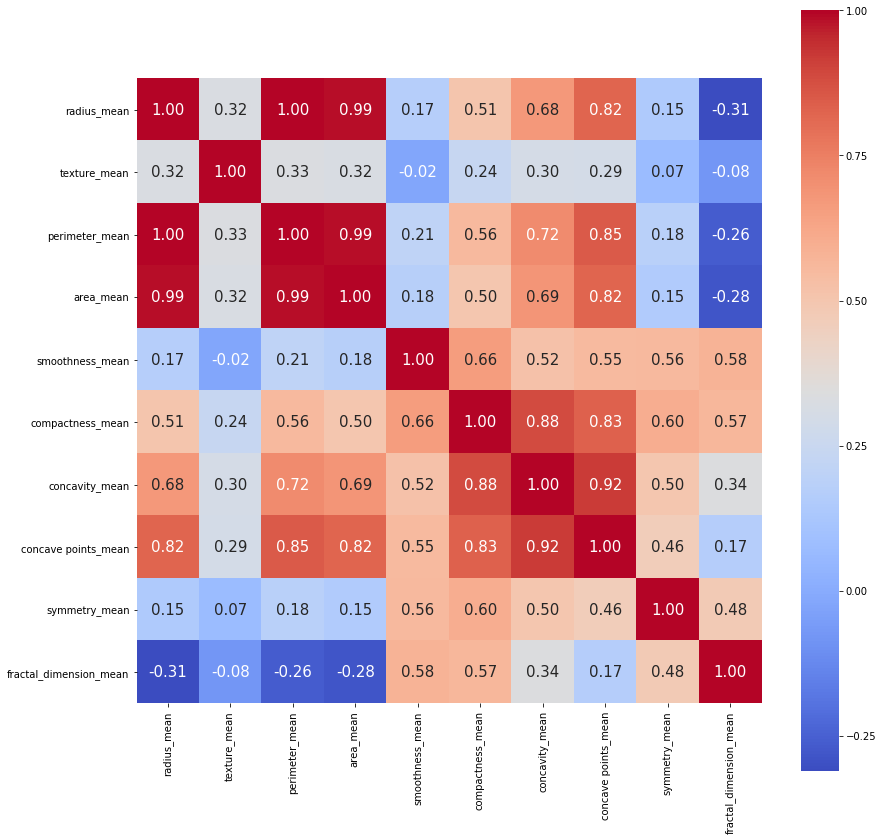

In [2]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

corr = data[features_mean].corr() 
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')
plt.savefig('correlation-matrix.eps')

In [3]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
train, test = train_test_split(data, test_size = 0.3)

train_X = train[prediction_var]
train_y=train.diagnosis

test_X= test[prediction_var]
test_y =test.diagnosis

In [4]:
LRG = LogisticRegression(C=1e10).fit(train_X, train_y)
print(LRG.score(test_X, test_y))
weight = LRG.coef_ 
print(weight)

0.9415204678362573
[[ 0.3477532   0.18752404 91.61424026  4.9230072  14.80220116]]


C:\Users\leoma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(test_y, LRG.predict(test_X))

explained_variance:  0.7418
mean_squared_log_error:  0.0281
r2:  0.7412
MAE:  0.0585
MSE:  0.0585
RMSE:  0.2418


In [6]:
from sklearn.metrics import classification_report

print(classification_report(test_y, LRG.predict(test_X)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       112
           1       0.93      0.90      0.91        59

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

